# About this notebook
#### As for all of my codes, the Author is Seyedsaman Emami

Hey, everyone.
Hope you are doing well.


In the following notebook, I extracted the 101 category images and labeled them. To build the ML model, I had to know more about the dataset, so I printed the images, and I moved to feature extraction. 
I used HOG (implement the Histogram orientation and gradient or HOG method for Image feature engineering and extract the highlights), resized the images to 64 * 64 sizes, and then convert their channel and finally defined my data frame to move the modeling.
For the modeling, I considered lightGBM model.

<h5>If you are interested in this problem and detailed analysis, you can copy this Notebook as follows</h5>

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1101107%2F8187a9b84c9dde4921900f794c6c6ff9%2FScreenshot%202020-06-28%20at%201.51.53%20AM.png?generation=1593289404499991&alt=media" alt="Copyandedit" width="300" height="300" class="center">

# Import libraries

In [1]:
import sys
import os
import PIL
import math
import time
import pathlib
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image, ImageOps
import tensorflow as tf
from numpy.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.preprocessing import LabelEncoder
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split

%matplotlib inline

warnings.simplefilter('ignore')

# Data Entry

In [2]:
path = '/kaggle/input/caltech101/101_ObjectCategories/'


input_path = []
labels = []
for dirname, _, filenames in os.walk(path):
    labels.append(_)
    for file in filenames:
        input_path.append(os.path.join(dirname, file))
labels = labels[0]

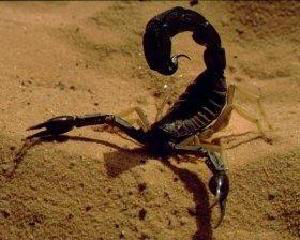

In [3]:
img = Image.open(input_path[0])
img

# Resizing the image

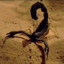

In [4]:
resized_image = img.resize((64, 64))
resized_image

# Calculating Gradients, orientations, for the image
compute the gradient for each pixel in the picture

In [5]:
fd, hog_image = hog(resized_image, orientations=9,
                    pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2),
                    visualize=True,
                    multichannel=True)

* I defined nine buckets to create (9 x 1 Matrix).
* The size of the normalized block is 2x2.
* And the histogram is 8 x 8.

## feature matrix

In [6]:
fd.shape

(1764,)

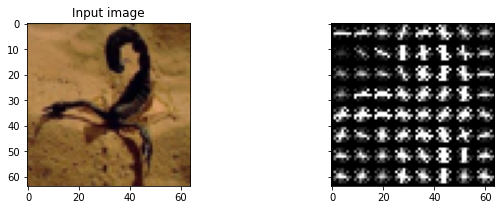

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2,
                               figsize=(10, 3),
                               sharex=True,
                               sharey=True)

ax1.imshow(resized_image, cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_ = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.imshow(hog_, cmap=plt.cm.gray)

plt.show()

# Define related methods and inputs of the ML models

In [8]:
def feature_extraction(img_i):
    resized = img_i.resize((64, 64))
    fd, hog_image = hog(resized, orientations=9,
                    pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2),
                    visualize=True,
                    multichannel=False)
    return fd

# Extract features for 1000 instances
#### I used the same HOG as I explained before, with this difference that I used grayscale image to skip the multichannel

In [9]:
features = []
for i, j in enumerate(input_path[:1000]):
    pic = ImageOps.grayscale(Image.open(input_path[i]))
    features.append(feature_extraction(pic))
features = np.array(features)

## Defining the target labels

In [10]:
lb = []
for i, j in enumerate(input_path):
    for k, m in enumerate(labels):
        if labels[k] in input_path[i]:
            lb.append(m)
lb = np.array(lb)

## Preparing the dataframe

In [11]:
X = features
y = lb[:1000]
scale = LabelEncoder()
y = scale.fit_transform(y)

In [12]:
df = pd.DataFrame(X)
df['label'] = y
df.head().T

,0,1,2,3,4
0,0.128293,0.0,0.091905,0.200082,0.293326
1,0.020796,0.0,0.032001,0.164099,0.000000
2,0.050222,0.0,0.104246,0.122814,0.169724
3,0.108325,0.0,0.130661,0.210318,0.000000
4,0.368449,0.0,0.216900,0.165918,0.051434
...,...,...,...,...,...
1760,0.257518,0.0,0.169227,0.120032,0.037073
1761,0.206358,0.0,0.091782,0.198884,0.023447
1762,0.257518,0.0,0.067321,0.176775,0.000000
1763,0.127159,0.0,0.034260,0.131841,0.000000
